In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras import layers
from keras import backend as K
from keras.utils.vis_utils import plot_model

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [3]:
url_train = '/content/drive/MyDrive/4.2/SoftCom/Dataset 3.csv'
data = pd.read_csv(url_train, engine='python')
data.head()

,tweets,sentiment
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [4]:
shuffled_data = data.sample(frac=1)
shuffled_data.head()

,tweets,sentiment
9401,May I remind you pips. Depression is not a jok...,1
7987,"Holland today, Chicago tonight and tomorrow fo...",0
1356,Going to say my prayers and go to sleep!,0
2600,fantastic song ? http://blip.fm/~7aaxh,0
4967,@britneyfrancis the regular.. trying to find s...,0


In [ ]:
shuffled_data.to_csv('/content/drive/MyDrive/4.2/SoftCom/shuffledData.csv')

In [ ]:
url_shuffled_data ='/content/drive/MyDrive/4.2/SoftCom/shuffledData.csv'
shuffled_data = pd.read_csv(url_shuffled_data, engine='python')
shuffled_data.head()

,Unnamed: 0,tweets,sentiment
0,9189,@Adnankhun @Nurulnxha Wuah I think Im falling ...,1
1,6862,Watchin a Film,0
2,7868,"@jonnyshare Haha, I like your style",0
3,5355,@capsontwittter Yeah. I don't know where. :| ))),0
4,4425,So glad that I have a job that doesn't make me...,0


In [5]:
EPOCH = 15

split_val = int(0.2 * shuffled_data.shape[0])

dataTest = shuffled_data.iloc[-split_val :]
dataVal = shuffled_data.iloc[- 2 * split_val : -split_val]
dataTrain = shuffled_data.iloc[: - 2 * split_val]

dataTest.head()



,tweets,sentiment
6745,I hardly ever get to say that,0
5871,@kylieireland Wont even go into the pool part ...,0
1861,@MortarWombat i want to ride my bicycle i want...,0
3923,This day off has been F-A-N-tastic!,0
2156,Bonjour twitters and twitteretts tgif,0


In [6]:
dataVal.head()

,tweets,sentiment
9583,25-04-18,1
5160,watching movies..,0
4700,with my amazing boyfriend for the night.. -lo...,0
7317,"@sunfloweryuki yuki~~ :O hai, hai nihongo wa m...",0
5010,taking a much needed nap nighty night.,0


In [7]:
dataTrain.head()

,tweets,sentiment
9401,May I remind you pips. Depression is not a jok...,1
7987,"Holland today, Chicago tonight and tomorrow fo...",0
1356,Going to say my prayers and go to sleep!,0
2600,fantastic song ? http://blip.fm/~7aaxh,0
4967,@britneyfrancis the regular.. trying to find s...,0


In [8]:
trainX = np.array(dataTrain.iloc[:, 0])
trainY = np.array(dataTrain.iloc[:, 1])

valX = np.array(dataVal.iloc[:, 0])
valY = np.array(dataVal.iloc[:, 1])

testX = np.array(dataTest.iloc[:, 0])
testY = np.array(dataTest.iloc[:, 1])

In [9]:
top_k = 50000
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = top_k,
                                                  oov_token = "<unk>",
                                                  filters = '!"#$%&()*+.,-/:;=?@[\]^_`{|}~')
tokenizer.fit_on_texts(trainX)

tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'

train_seqs = tokenizer.texts_to_sequences(trainX)
val_seqs = tokenizer.texts_to_sequences(valX)
test_seqs = tokenizer.texts_to_sequences(testX)

train_seqs = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding = 'pre')
val_seqs = tf.keras.preprocessing.sequence.pad_sequences(val_seqs, padding = 'pre')
test_seqs = tf.keras.preprocessing.sequence.pad_sequences(test_seqs, padding = 'pre')

In [10]:
model = Sequential()
model.add(layers.Embedding(len(tokenizer.word_index), 128))
model.add(layers.Bidirectional(layers.SimpleRNN(256, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.SimpleRNN(512, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.SimpleRNN(64, return_sequences = True, dropout = 0.2)))
model.add(layers.Bidirectional(layers.SimpleRNN(8, dropout = 0.2)))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         2080128   
_________________________________________________________________
bidirectional (Bidirectional (None, None, 512)         197120    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 1024)        1049600   
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         139392    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 16)                2192      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 3,468,449
Trainable params: 3,468,449
Non-trainable params: 0
______________________________________________

Epoch 1/15
194/194 [==============================] - 185s 924ms/step - loss: 0.5509 - accuracy: 0.7627 - val_loss: 0.5470 - val_accuracy: 0.7677
Epoch 2/15
194/194 [==============================] - 181s 932ms/step - loss: 0.5358 - accuracy: 0.7730 - val_loss: 0.5358 - val_accuracy: 0.7735
Epoch 3/15
194/194 [==============================] - 182s 940ms/step - loss: 0.5209 - accuracy: 0.7850 - val_loss: 0.5364 - val_accuracy: 0.7735
Epoch 4/15
194/194 [==============================] - 182s 940ms/step - loss: 0.5240 - accuracy: 0.7813 - val_loss: 0.5355 - val_accuracy: 0.7721
Epoch 5/15
194/194 [==============================] - 183s 945ms/step - loss: 0.5240 - accuracy: 0.7793 - val_loss: 0.5404 - val_accuracy: 0.7716
Epoch 6/15
194/194 [==============================] - 183s 946ms/step - loss: 0.5210 - accuracy: 0.7809 - val_loss: 0.5442 - val_accuracy: 0.7716
Epoch 7/15
194/194 [==============================] - 182s 940ms/step - loss: 0.5226 - accuracy: 0.7800 - val_loss: 0.5621 -

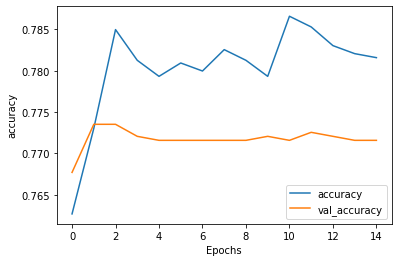

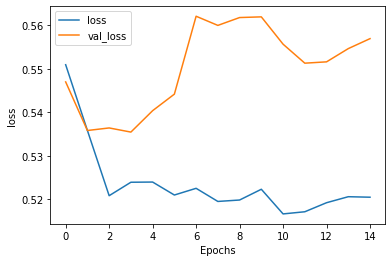


Epoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss
       1   0.762682 	   0.550945 	   0.767701 	   0.547000
       2   0.773021 	   0.535850 	   0.773521 	   0.535841
       3   0.784976 	   0.520872 	   0.773521 	   0.536428
       4   0.781260 	   0.523960 	   0.772066 	   0.535477
       5   0.779321 	   0.524005 	   0.771581 	   0.540393
       6   0.780937 	   0.521026 	   0.771581 	   0.544191
       7   0.779968 	   0.522566 	   0.771581 	   0.562077
       8   0.782552 	   0.519552 	   0.771581 	   0.559975
       9   0.781260 	   0.519879 	   0.771581 	   0.561778
      10   0.779321 	   0.522349 	   0.772066 	   0.561934
      11   0.786591 	   0.516688 	   0.771581 	   0.555663
      12   0.785299 	   0.517183 	   0.772551 	   0.551301
      13   0.783037 	   0.519260 	   0.772066 	   0.551605
      14   0.782068 	   0.520640 	   0.771581 	   0.554647
      15   0.781583 	   0.520523 	   0.771581 	   0.556936


In [11]:
history = model.fit(train_seqs, trainY, epochs = EPOCH, validation_data = (val_seqs, valY), verbose = 1)

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

print('\nEpoch No.  Train Accuracy  Train Loss     Val Accuracy    Val Loss')
for i in range(EPOCH):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['accuracy'][i], history.history['loss'][i], history.history['val_accuracy'][i], history.history['val_loss'][i]))

194/194 [==============================] - 35s 175ms/step - loss: 0.5214 - accuracy: 0.7834
Train Loss: 0.5214105248451233
Train Accuracy: 0.7833602428436279 (Model Metric)
Train Accuracy: 0.7833602584814217 (sklearn Metric)
Train Precision: 0.6293436293436293
Train Recall: 0.11576704545454546
Train F1-score: 0.19556088782243553


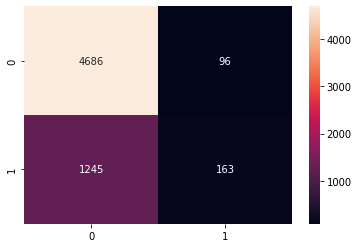

In [12]:
y_pred = model.predict(train_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(train_seqs, trainY, verbose = 1)
print('Train Loss:', loss)
print('Train Accuracy:', accuracy, '(Model Metric)')
print('Train Accuracy:', accuracy_score(trainY, y_pred), '(sklearn Metric)')
print('Train Precision:', precision_score(trainY, y_pred))
print('Train Recall:', recall_score(trainY, y_pred))
print('Train F1-score:', f1_score(trainY, y_pred))

sns.heatmap(confusion_matrix(trainY, y_pred), annot = True, fmt = 'g')

65/65 [==============================] - 10s 151ms/step - loss: 0.5569 - accuracy: 0.7716
Validation Loss: 0.5569357872009277
Validation Accuracy: 0.7715809941291809 (Model Metric)
Validation Accuracy: 0.7715809893307468 (sklearn Metric)
Validation Precision: 0.475
Validation Recall: 0.04051172707889126
Validation F1-score: 0.07465618860510806


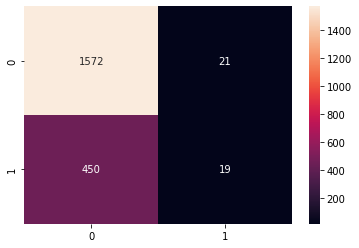

In [13]:
y_pred = model.predict(val_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(val_seqs, valY, verbose = 1)
print('Validation Loss:', loss)
print('Validation Accuracy:', accuracy, '(Model Metric)')
print('Validation Accuracy:', accuracy_score(valY, y_pred), '(sklearn Metric)')
print('Validation Precision:', precision_score(valY, y_pred))
print('Validation Recall:', recall_score(valY, y_pred))
print('Validation F1-score:', f1_score(valY, y_pred))

sns.heatmap(confusion_matrix(valY, y_pred), annot = True, fmt = 'g')

65/65 [==============================] - 9s 126ms/step - loss: 0.5098 - accuracy: 0.7924
Test Loss: 0.5097615718841553
Test Accuracy: 0.7924345135688782 (Model Metric)
Test Accuracy: 0.7924345295829291 (sklearn Metric)
Test Precision: 0.6097560975609756
Test Recall: 0.057208237986270026
Test F1-score: 0.10460251046025106


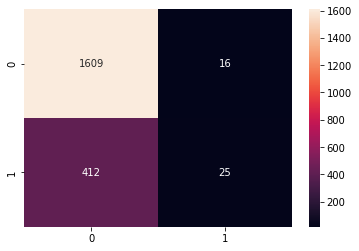

In [14]:
y_pred = model.predict(test_seqs)

y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred = np.reshape(y_pred, (y_pred.shape[0]))

loss, accuracy = model.evaluate(test_seqs, testY, verbose = 1)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy, '(Model Metric)')
print('Test Accuracy:', accuracy_score(testY, y_pred), '(sklearn Metric)')
print('Test Precision:', precision_score(testY, y_pred))
print('Test Recall:', recall_score(testY, y_pred))
print('Test F1-score:', f1_score(testY, y_pred))

sns.heatmap(confusion_matrix(testY, y_pred), annot = True, fmt = 'g')